In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\WA_Fn-UseC_-HR-Employee-Attrition.csv.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Data Explanation
- There are various labels to predict whether attrition occurs or not.
- A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them.
- We have to analyse how does attrition affects companies using various variable

# Exploratory Data Analysis
## Identifying variables and data types

In [3]:
data.shape

(1470, 35)

The dataframe looks good with good amount of data

## Checking data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- There is NaN values present in any of the columns.
- There are 9 columns which is of object data type which has to be encoded
    - Attrition                 
    - BusinessTravel            
    - Department                
    - EducationField            
    - Gender                    
    - JobRole                   
    - MaritalStatus             
    - Over18                    
    - OverTime                  

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- There are totally 35 columns where 34 helps us to analyse the attrition rate
- Remove Employee number, Employee Count which does not help us

In [6]:
data = data.drop(['EmployeeNumber','EmployeeCount'], axis = 1)

Removed employee number

## Treating NaN values

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

There is no NaN values present, check with data.info to check NaN values present in object column

## Visualisation of categorical variable

In [8]:
class_data = data[['Attrition','BusinessTravel','Department','EducationField','Gender','EnvironmentSatisfaction','MaritalStatus','Over18','OverTime','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','StandardHours','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','JobRole','Education','TrainingTimesLastYear']]

<function matplotlib.pyplot.show(close=None, block=None)>

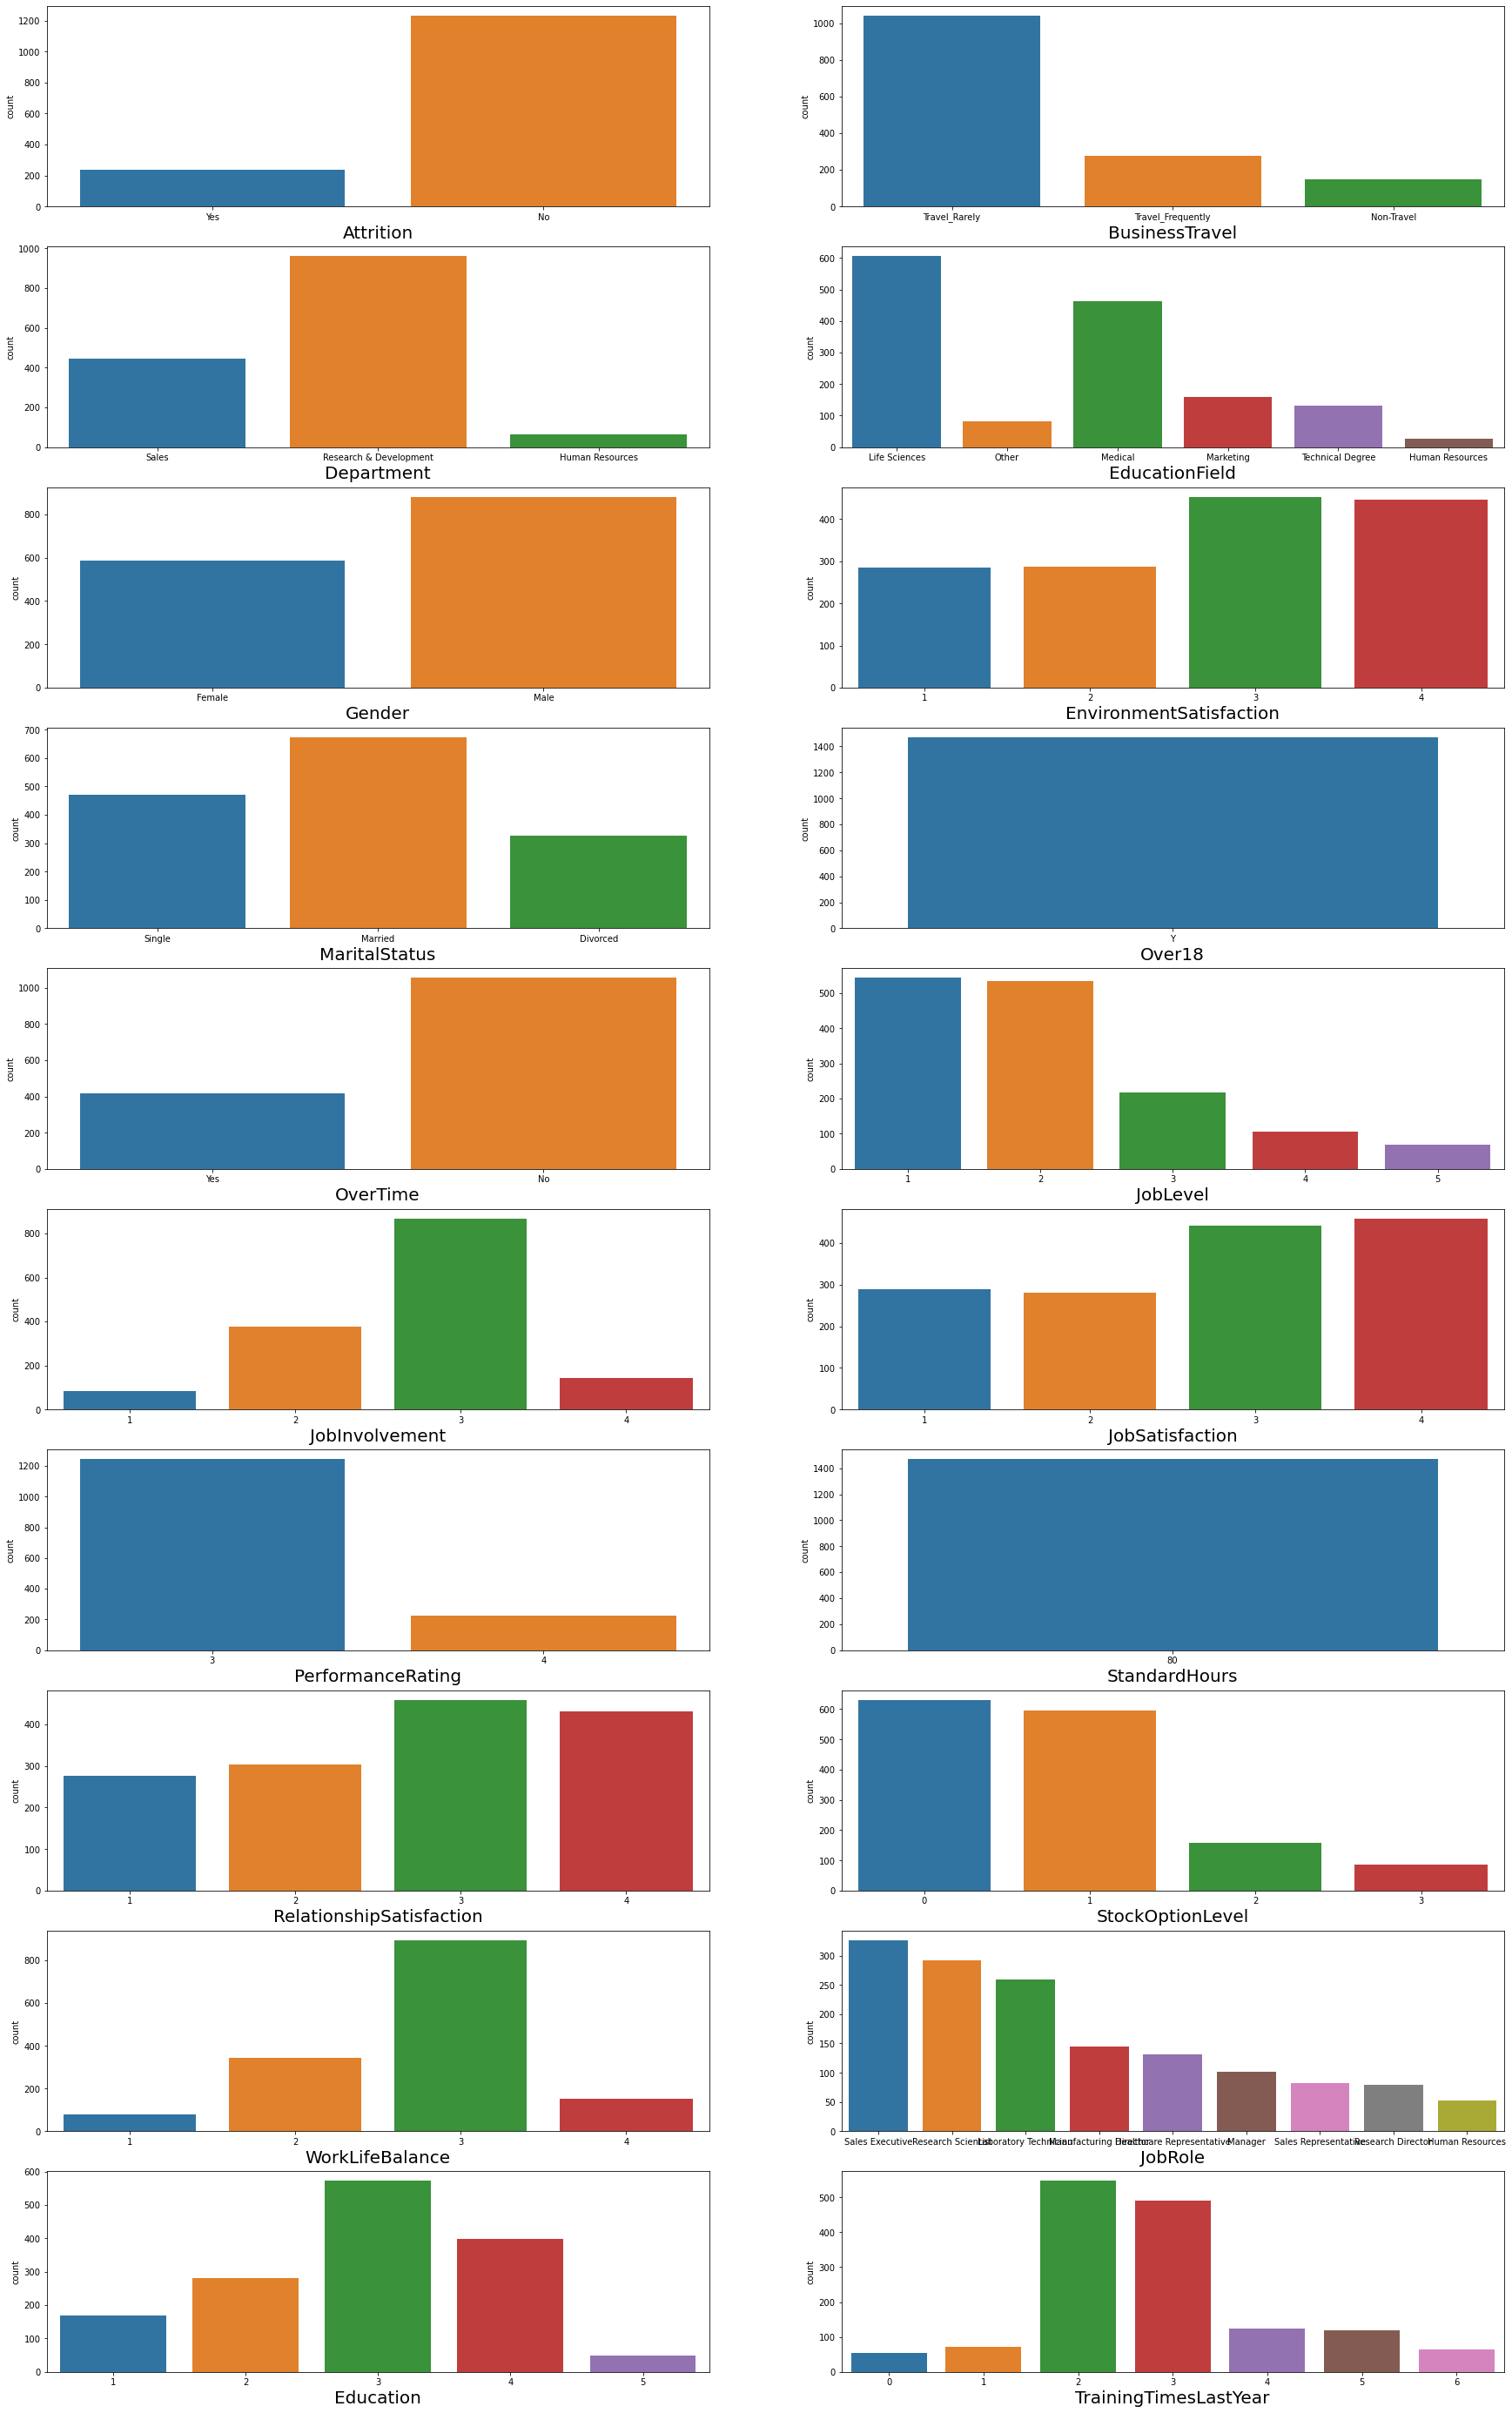

In [9]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=20:
        ax =  plt.subplot(10,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Attrition rate is lower
- Travelling for business is rare
- Research and development department has more number of employees
- In education field life sciences studied employees are more
- Male gender is more compared to female
- Environment satisfaction is 3 and 4 (most likely equal)
- Married employees are more
- Employees work overtime is less
- Employees working in top position is higher compare to other levels
- Rating 3 is more in job involvement
- Rating 3 and 4 are most likely equali in job satisfaction
- Rating 3 is more in performance rating
- Rating 3 is given more for relationship satisfaction
- 0 and 1 are most likely equal in stock option level
- According to work life balance, rating 3 is more compared to others
- Sales Executive jobrole has the more no.of employees
- Rating 3 is more in education part
- 2 times training in the last year is more
- Standard hours and over18 has only one value which is not going to affect the analysis. So, remove it

In [10]:
data = data.drop(['Over18','StandardHours'], axis = 1)

## Visualisation of Continuous variable

In [11]:
continuous_data = data.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','EnvironmentSatisfaction','MaritalStatus','OverTime','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','JobRole','Education','TrainingTimesLastYear'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

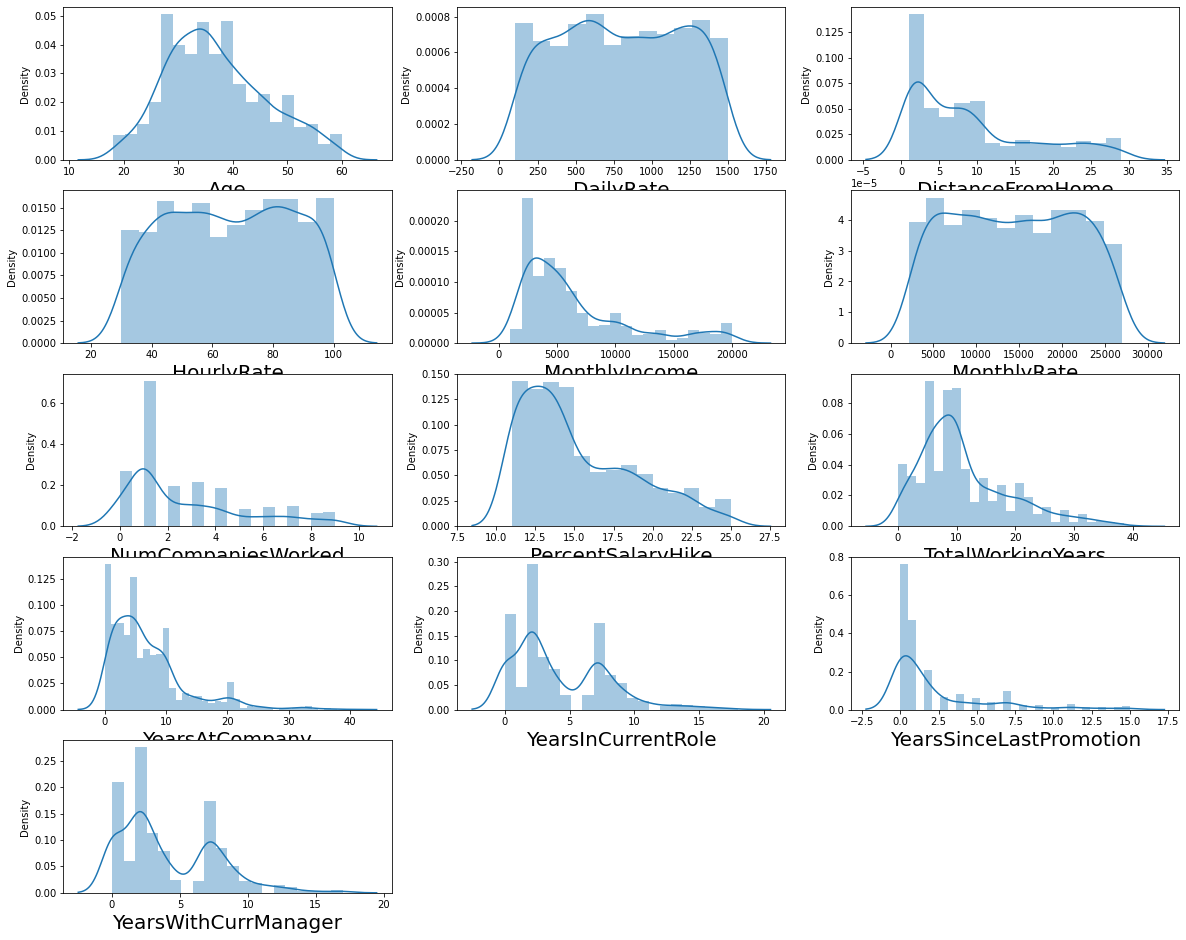

In [12]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=45:
        ax =  plt.subplot(15,3,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Age looks normally distributed
- Daily rate looks normally distributed
- Distance from is little skewed
- Hourly rate looks normally distributed
- Monthly income is little skewed
- Monthly Rate looks normally distributed
- No.of companies worked is little skewed
- Percent salary hike is little skewed
- Total working years is little skewed
- Years at company is little skewed
- Years in current role is little skewed
- Years since last promotion is little skewed
- Years with current manager is little skewed

## Encoding

In [13]:
print(data['Attrition'].nunique())
print(data['BusinessTravel'].nunique())
print(data['Department'].nunique())
print(data['EducationField'].nunique())
print(data['Gender'].nunique())
print(data['JobRole'].nunique())
print(data['MaritalStatus'].nunique())
print(data['OverTime'].nunique())

2
3
3
6
2
9
3
2


In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [15]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


## Describing the data after encoding

In [16]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The data has to be standardised. Since all the columns(are encoded) is in integer/float, statistics for all columns is defined

## Correlation

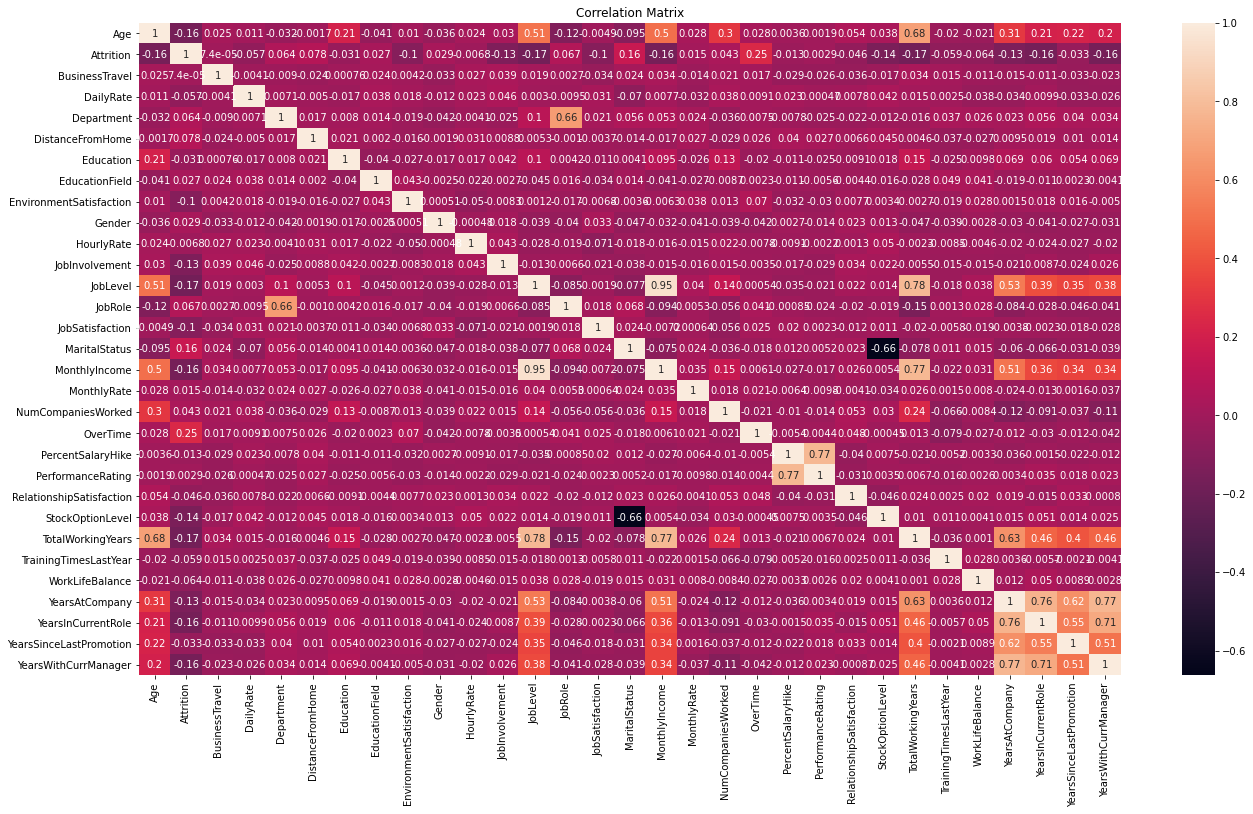

In [17]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

There are many positively and negatively correlated variables. But,Job level and Monthly income are more correlated. Check using scatterplot.

## Confirming the correlation existence

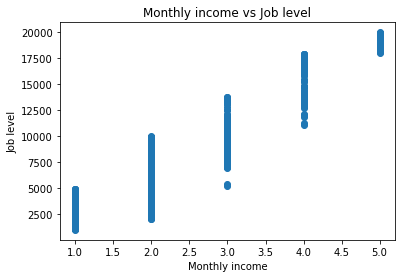

In [18]:
plt.scatter(data.JobLevel, data.MonthlyIncome)
plt.xlabel('Monthly income')
plt.ylabel('Job level')
plt.title ('Monthly income vs Job level')
plt.show()

Yes, both are correlated. So, remove job level

In [19]:
data = data.drop(['JobLevel'],axis=1)

Removed JobLevel column since it is correlated

## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

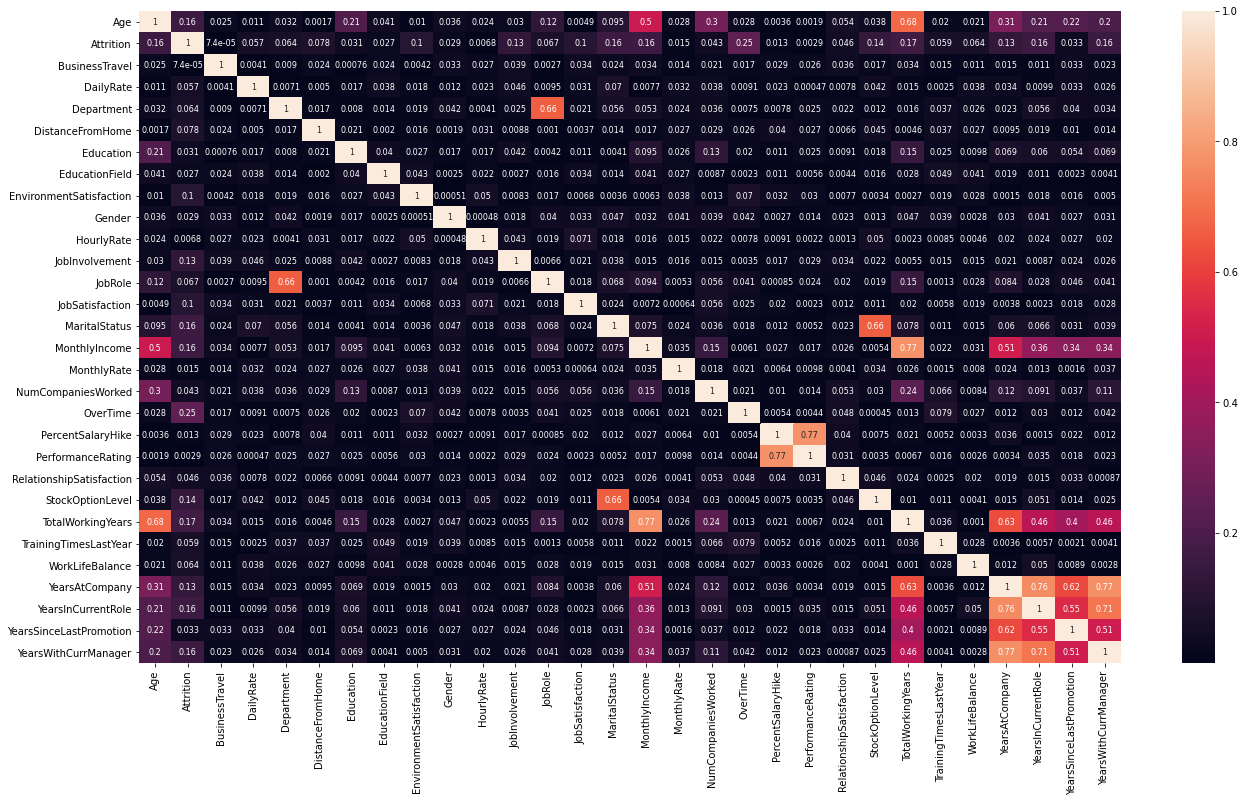

In [20]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no high collinearity between variables

## Treat Skewness

In [21]:
x = data.drop('Attrition',axis=1)
y = data['Attrition']

In [22]:
x.skew()
x.skew().sort_values()

BusinessTravel             -1.439006
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
MonthlyRate                 0.018578
Department                  0.172231
Age                         0.413286
EducationField              0.550371
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
YearsAtCompany              1.764529
P

Since there are more skewed data. Treat with power transformation

In [23]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)  # this comes in nparray.so, convert to DataFrame
x = pd.DataFrame (x_new,columns = x.columns)

Treated the skewed data using power transform

In [24]:
x.skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
NumCompaniesWorked          0.014814
Department                  0.013801
MonthlyIncome               0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
JobRole                    -0.319659
G

Check whether skewness is treated or not.

## Treat Outliers

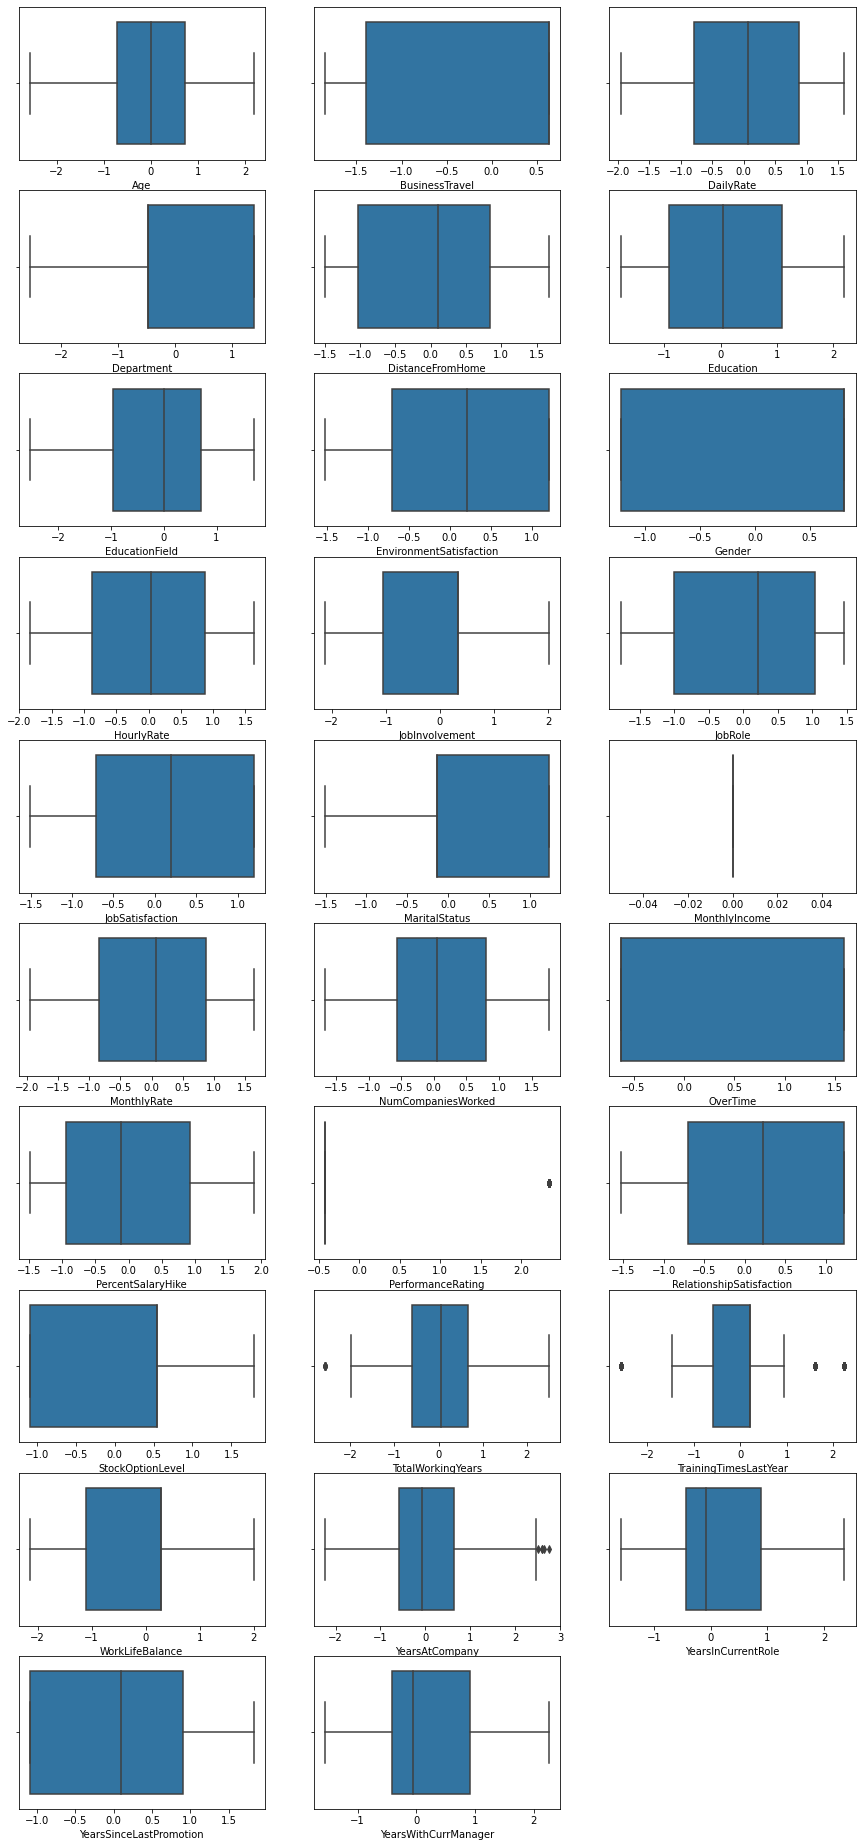

In [25]:
plt.figure(figsize=(15,50))
graph = 1
for column in x:
    if graph<=45:
        ax = plt.subplot(15,3,graph)
        sns.boxplot(x[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There are outliers in more than 10 variables.
- BusinessTravel             
- TrainingTimesLastYear       
- YearsWithCurrManager        
- YearsInCurrentRole                        
- StockOptionLevel            
- NumCompaniesWorked         
- TotalWorkingYears           
- MonthlyIncome               
- YearsAtCompany              
- PerformanceRating           
- YearsSinceLastPromotion  

## Quantify

In [26]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [27]:
data['BusinessTravel_zscore'] = zscore(data['BusinessTravel'])
data['is_outlier'] = data['BusinessTravel_zscore'].apply(lambda x: x<=-3 or x>=3)
data['TrainingTimesLastYear_zscore'] = zscore(data['TrainingTimesLastYear'])
data['is_outlier'] = data['TrainingTimesLastYear_zscore'].apply(lambda x: x<=-3 or x>=3)
data['YearsWithCurrManager_zscore'] = zscore(data['YearsWithCurrManager'])
data['is_outlier'] = data['YearsWithCurrManager_zscore'].apply(lambda x: x<=-3 or x>=3)
data['YearsInCurrentRole_zscore'] = zscore(data['YearsInCurrentRole'])
data['is_outlier'] = data['YearsInCurrentRole_zscore'].apply(lambda x: x<=-3 or x>=3)
data['StockOptionLevel_zscore'] = zscore(data['StockOptionLevel'])
data['is_outlier'] = data['StockOptionLevel_zscore'].apply(lambda x: x<=-3 or x>=3)
data['NumCompaniesWorked_zscore'] = zscore(data['NumCompaniesWorked'])
data['is_outlier'] = data['NumCompaniesWorked_zscore'].apply(lambda x: x<=-3 or x>=3)
data['TotalWorkingYears_zscore'] = zscore(data['TotalWorkingYears'])
data['is_outlier'] = data['TotalWorkingYears_zscore'].apply(lambda x: x<=-3 or x>=3)
data['MonthlyIncome_zscore'] = zscore(data['MonthlyIncome'])
data['is_outlier'] = data['MonthlyIncome_zscore'].apply(lambda x: x<=-3 or x>=3)
data['YearsAtCompany_zscore'] = zscore(data['YearsAtCompany'])
data['is_outlier'] = data['YearsAtCompany_zscore'].apply(lambda x: x<=-3 or x>=3)
data['PerformanceRating_zscore'] = zscore(data['PerformanceRating'])
data['is_outlier'] = data['PerformanceRating_zscore'].apply(lambda x: x<=-3 or x>=3)
data['YearsSinceLastPromotion_zscore'] = zscore(data['YearsSinceLastPromotion'])
data['is_outlier'] = data['YearsSinceLastPromotion_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear_zscore,YearsWithCurrManager_zscore,YearsInCurrentRole_zscore,StockOptionLevel_zscore,NumCompaniesWorked_zscore,TotalWorkingYears_zscore,MonthlyIncome_zscore,YearsAtCompany_zscore,PerformanceRating_zscore,YearsSinceLastPromotion_zscore
45,41,1.0,2.0,1360,1.0,12,3,5.0,2,0.0,...,-2.171982,1.086895,2.973780,-0.932014,-0.678049,1.506840,2.771161,2.447870,-0.426230,3.977310
62,50,0.0,2.0,989,1.0,7,2,3.0,2,0.0,...,-0.620189,1.086895,-0.339394,0.241988,0.923771,2.278234,2.600116,3.264271,-0.426230,3.356449
64,36,0.0,2.0,1223,1.0,8,3,5.0,3,0.0,...,-0.620189,1.086895,2.697683,2.589994,-0.678049,0.735447,0.763450,1.631469,-0.426230,3.046019
110,51,0.0,1.0,1456,1.0,1,4,3.0,1,0.0,...,-1.396086,1.086895,2.145487,-0.932014,0.122861,1.506840,0.208456,0.978348,2.346151,3.046019
123,51,0.0,2.0,684,1.0,6,3,1.0,1,1.0,...,1.707500,3.049371,3.802074,-0.932014,1.724681,1.506840,2.769461,2.121310,-0.426230,3.977310
126,58,1.0,2.0,147,1.0,23,4,3.0,4,0.0,...,0.155707,0.526188,1.593291,0.241988,-0.678049,3.692454,0.809346,5.386914,-0.426230,3.977310
178,46,0.0,2.0,526,2.0,1,2,2.0,2,0.0,...,-0.620189,0.806541,2.421585,2.589994,-0.678049,1.635406,0.839305,2.774431,2.346151,3.977310
218,45,0.0,0.0,1052,2.0,6,3,3.0,4,0.0,...,-0.620189,1.086895,0.764998,-0.932014,1.324226,1.506840,0.501889,1.958030,-0.426230,3.046019
237,52,0.0,0.0,771,2.0,2,4,1.0,1,1.0,...,-0.620189,2.208310,0.764998,-0.932014,-0.678049,2.792496,2.669809,4.243953,-0.426230,3.977310
326,39,0.0,1.0,672,1.0,7,2,3.0,3,1.0,...,-0.620189,-0.314873,1.317193,0.241988,-0.678049,1.249709,2.713155,2.284590,-0.426230,3.356449


There are 42 rows, which has the outliers

In [28]:
data = data.drop([45,62,64,110,123,126,178,218,237,326,386,425,427,535,584,595,653,701,752,799,838,861,875,914,922,926,937,976,1008,1078,1086,1093,1138,1156,1221,1223,1242,1295,1301,1303,1331,1414],axis=0)

Removed outliers. Check for data loss

In [29]:
data.shape

(1428, 42)

In [30]:
Data_loss = ((1470-1428)/1470)*100
Data_loss

2.857142857142857

Data loss is 2.85%, which might be accpetable. Because, working with outliers will not give good accuracy

# Model Building

In [31]:
x = data.drop('Attrition', axis = 1)
y = data['Attrition']

## Finding the relationship between dependent and independent variable

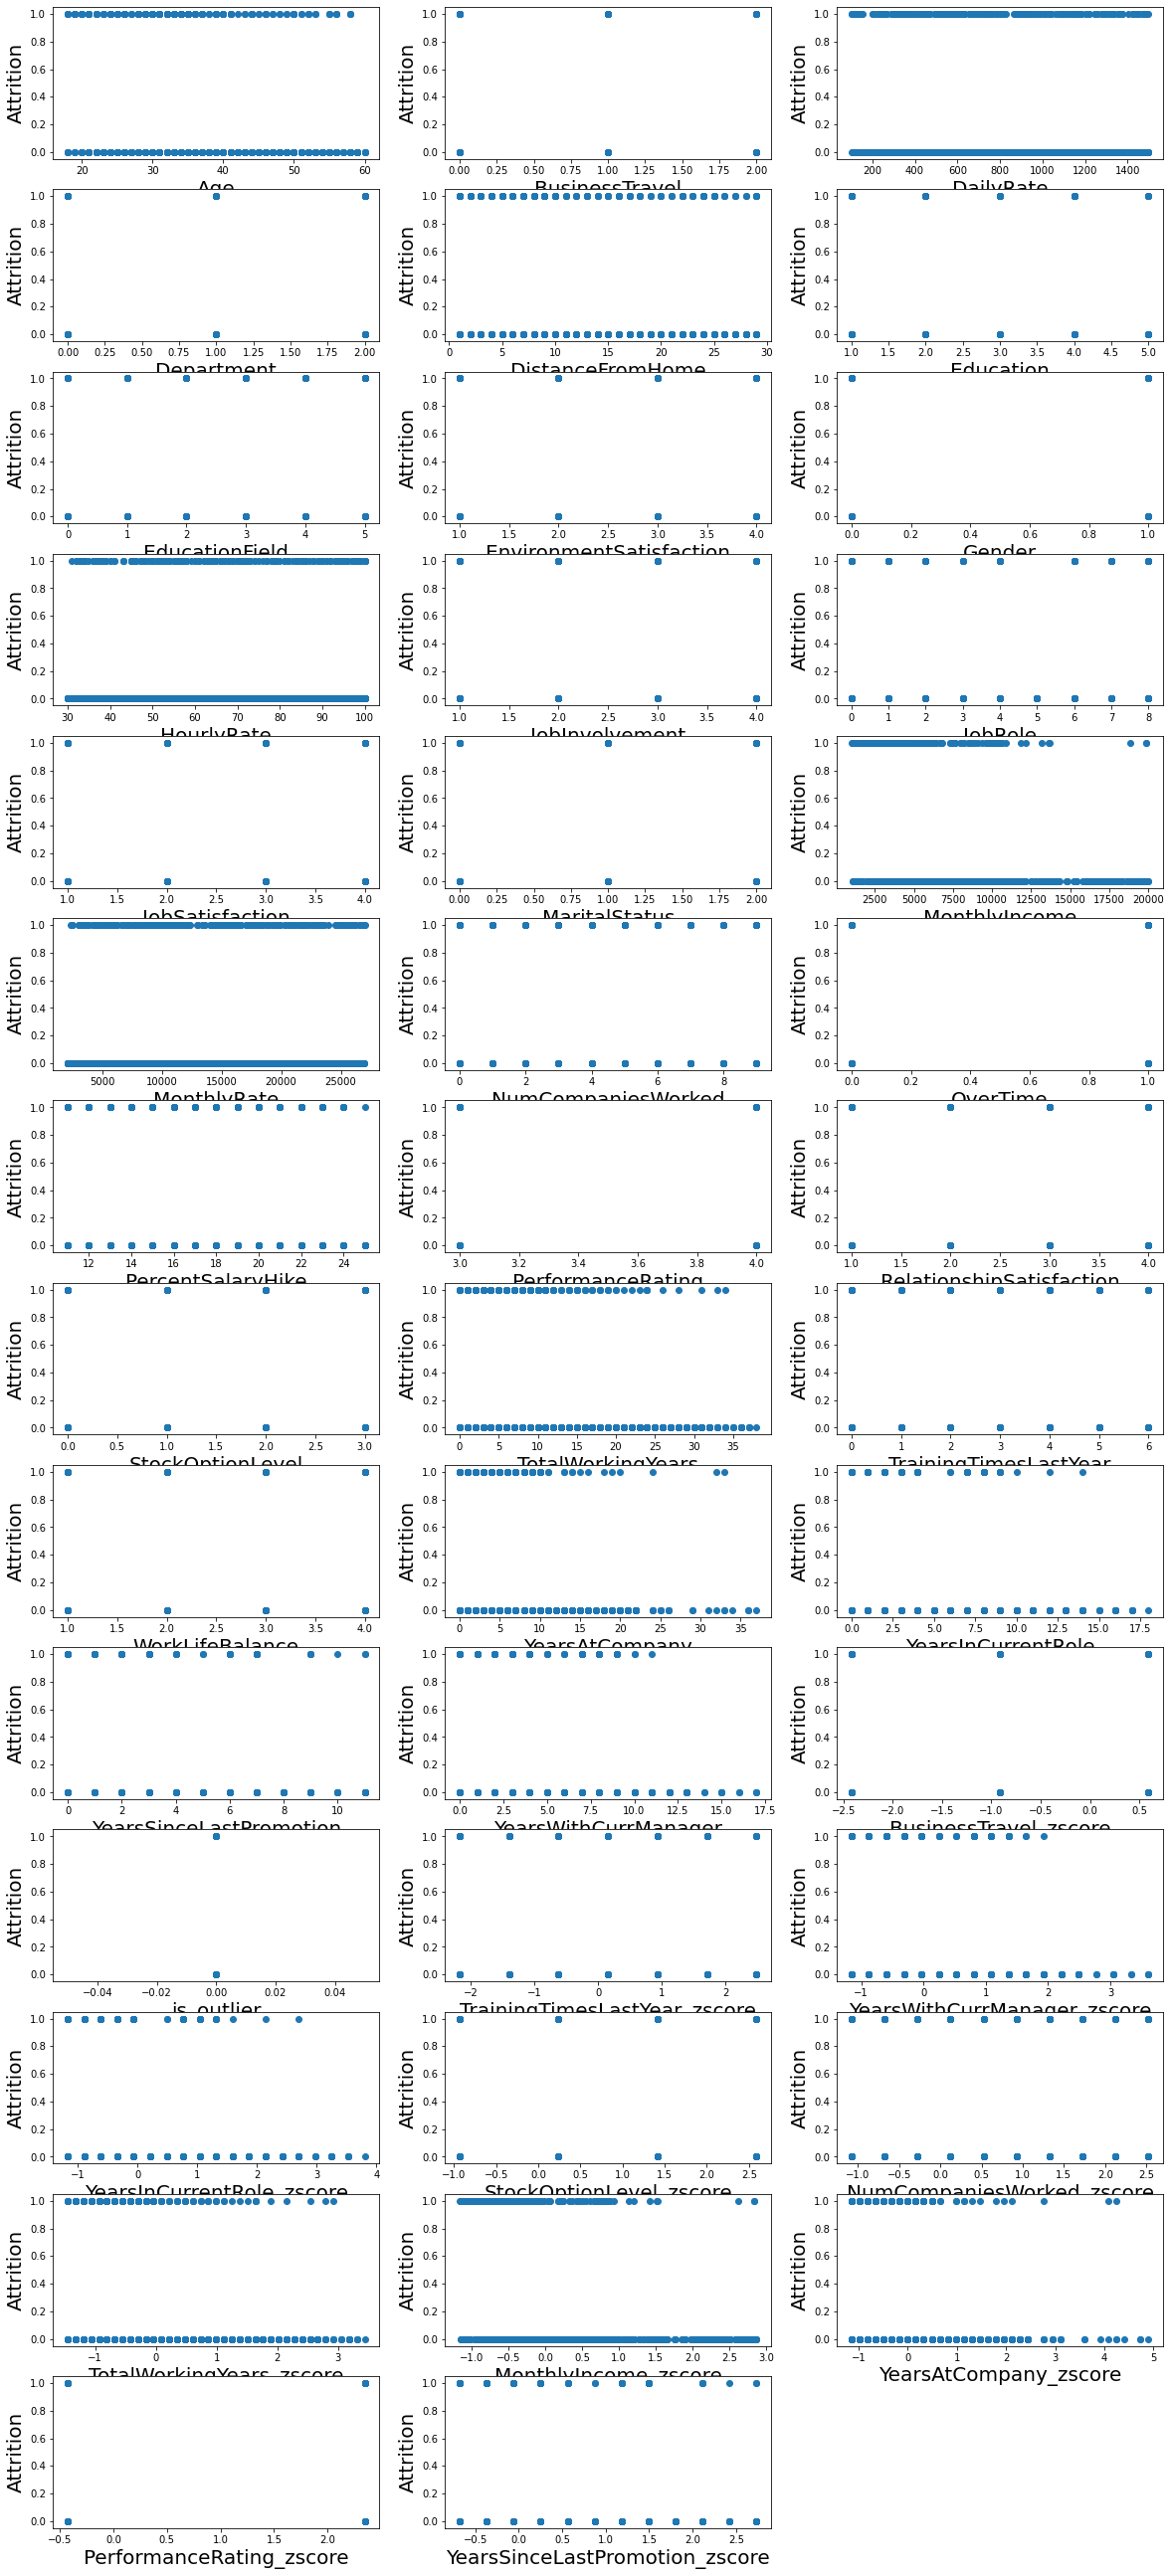

In [32]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=45:
        ax = plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Attrition', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship looks fairly linear

## Standardisation

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the data is standardised

## Finding best random state

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [35]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.9055944055944056 on Random State 77


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 77)

## Logistic Regression

In [37]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 90.55944055944056
[[247   5]
 [ 22  12]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       252
         1.0       0.71      0.35      0.47        34

    accuracy                           0.91       286
   macro avg       0.81      0.67      0.71       286
weighted avg       0.89      0.91      0.89       286



Accuracy score is 0.91

## Decision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.06993006993007
[[220  32]
 [ 25   9]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       252
         1.0       0.22      0.26      0.24        34

    accuracy                           0.80       286
   macro avg       0.56      0.57      0.56       286
weighted avg       0.82      0.80      0.81       286



Accuracy score is 0.79

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 80.06993006993007
[[220  32]
 [ 25   9]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       252
         1.0       0.22      0.26      0.24        34

    accuracy                           0.80       286
   macro avg       0.56      0.57      0.56       286
weighted avg       0.82      0.80      0.81       286



Accuracy score is 0.79

## SVC

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 89.5104895104895
[[250   2]
 [ 28   6]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       252
         1.0       0.75      0.18      0.29        34

    accuracy                           0.90       286
   macro avg       0.82      0.58      0.61       286
weighted avg       0.88      0.90      0.87       286



Accuracy score is 0.90.
- On comparing all the accuracy scores, Logistic regression has the best accuracy score. Cross check with cross validation score. 

## Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=10)
print('SVC cvs:',sc3.mean())

LR cvs: 0.8704471584753275
DT cvs: 0.789215010341771
RFC cvs: 0.8557470698315768
SVC cvs: 0.8606470993794938


- The cross validation score for Logistic regression is 0.87
    - Accuracy is 0.91
- The cross validation score for Decision tree classifier is 0.79
    - Accuracy is 0.79
- The cross validation score for Random forest classifier is 0.85
    - Accuracy is 0.79
- The cross validation score for SVC is 0.86
    - Accuracy is 0.90

Based on CV score and accuracy score, Logistic regression looks better compared to other scores.

## Hyper parameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [77]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'random_state': 77}

In [44]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.8846153846153846

On tuning the parameters, the score is 0.88. So, use the Logistic regression model to evaluate.

## ROC AUC Score

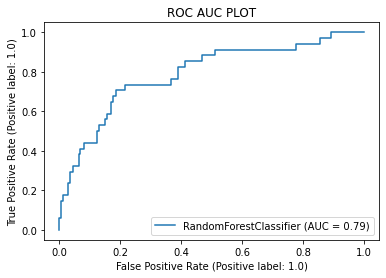

In [45]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GVC.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

## Save the model

In [46]:
import joblib
joblib.dump(LR,'HR_Analytics_Project.pkl')

['HR_Analytics_Project.pkl']

Thus the model is saved